In [670]:
!pip install scikit-surprise

In [672]:
import pandas as  pd
import numpy as np
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
#from surprise import evaluate, print_perf
from surprise import accuracy
import random

In [2]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [94]:
uprofile =pd.read_csv("userid-profile.tsv", sep='\t')

In [95]:
uprofile.head()

,#id,gender,age,country,registered
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"


In [96]:
udata =pd.read_csv("userid-timestamp-artid-artname-traid-traname.tsv", sep='\t' ,error_bad_lines=False,names=['userid','timestamp','artid','artname','traid','traname'])

In [97]:
udata.head()

,userid,timestamp,artid,artname,traid,traname
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [98]:
udata.tail(5)

,userid,timestamp,artid,artname,traid,traname
19098857,user_001000,2008-01-27T22:02:35Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,a490cabc-1e5c-4807-86c7-740c31a50009,Please Be Patient With Me
19098858,user_001000,2008-01-27T21:56:52Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3e92e447-9e1f-440d-bc00-6734469880c5,Shake It Off
19098859,user_001000,2008-01-27T21:52:36Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,93d044e6-1bbb-46a6-ac8e-283382a89e6f,Side With The Seeds
19098860,user_001000,2008-01-27T21:49:12Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,5ac4386f-6146-4389-a762-4b43f362d2c8,Sky Blue Sky
19098861,user_001000,2008-01-27T21:43:14Z,9e53f84d-ef44-4c16-9677-5fd4d78cbd7d,Wilco,3acc99bc-a349-420f-ad28-7095eb3533c9,Impossible Germany


In [99]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19098862 entries, 0 to 19098861
Data columns (total 6 columns):
userid       object
timestamp    object
artid        object
artname      object
traid        object
traname      object
dtypes: object(6)
memory usage: 874.3+ MB


In [100]:
udata.dtypes

userid       object
timestamp    object
artid        object
artname      object
traid        object
traname      object
dtype: object

In [101]:
udata.shape

(19098862, 6)

In [102]:
#valores omitidos por variable
missing_values_table(udata)

,Missing Values,% of Total Values
userid,0,0.000000
timestamp,0,0.000000
artid,600853,3.146015
artname,0,0.000000
traid,2162726,11.323847
traname,12,0.000063


In [7]:
#eliminar nulos
####udata =udata.dropna()

In [93]:
udata.shape

(16936135, 6)

In [15]:
#Eliminar nulos por traid
###udata = udata.dropna(subset=['traid'])

In [103]:
#Eliminar nulos por artista
udata = udata.dropna(subset=['artid'])

In [104]:
udata.shape

(18498009, 6)

In [105]:
#Evalucacion duplicados
udata[udata.duplicated()]

,userid,timestamp,artid,artname,traid,traname
5307319,user_000274,2008-10-31T21:52:29Z,6e913bad-4812-4286-b6cc-18548422f194,John Foxx,f8317357-7fea-47d4-9e2f-3fe91ef349c9,He'S A Liquid (Alternative Version)


In [106]:
#eliminacion duplicados
udata =udata.drop_duplicates()

In [107]:
udata.shape

(18498008, 6)

In [108]:
udata.describe()

,userid,timestamp,artid,artname,traid,traname
count,18498008,18498008,18498008,18498008,16936135,18497998
unique,992,16952863,107295,104511,960402,972246
top,user_000949,2009-02-26T21:29:15Z,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,db16d0b3-b8ce-4aa8-a11a-e4d53cc7f8a6,Intro
freq,180840,227,115099,115099,3991,16594


In [19]:

#for x, y in zip(udata['artid'], udata['artname']):
#    print(y)
#    break;


坂本龍一


In [110]:
usrxtraid =udata.groupby(["userid"])["artid"].agg({'count'}).sort_values(by='count', ascending=False)

In [111]:
usrxtraid.shape

(992, 1)

# Usuarios Mas activos

In [112]:
usrxtraid.head(10)

,count
userid,
user_000949,180840
user_000791,156589
user_000861,151150
user_000544,150468
user_000800,135910
user_000691,127633
user_000274,123001
user_000155,121599
user_000349,111059


In [113]:
usrxtraid.mean()

count    18647.185484
dtype: float64

In [ ]:
# los usuarios escucharon en promedio 18.647  artistas 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8C0B03470>]],
      dtype=object)

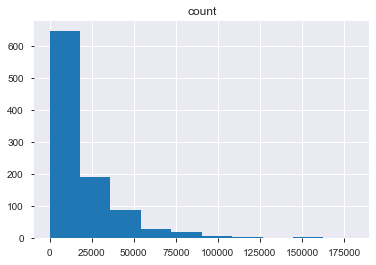

In [114]:
usrxtraid.hist()

In [153]:
total = usrxtraid.shape[0]
Mpromedio = usrxtraid[usrxtraid['count']>18647].count()
mpromedio =total  - Mpromedio

print('Usuarios que escucharon más del promedio    : %d - %d%%' % (Mpromedio,round(Mpromedio*100/total) ) ) 
print('Usuarios que escucharon menos del promedio  : %d - %d%%' % (mpromedio,round(mpromedio*100/total) ) ) 

Usuarios que escucharon más del promedio    : 327 - 33%
Usuarios que escucharon menos del promedio  : 665 - 67%


In [ ]:
#fenomeno de la cola
# Pocos usurios 32% escucharn muchos artiastas, mas de 18.647 artistas
# Muchos usuario 67% escucahro pocos artitas hasta 18.647  artistas 

# Artistas mas escuchados

In [117]:
udata.groupby(["artid"])["userid"].agg({'count'}).sort_values(by='count', ascending=False).head(10)

,count
artid,
a74b1b7f-71a5-4011-9441-d0b5e4122711,115099
b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,100126
b7ffd2af-418f-4be2-bdd1-22f8b48613da,84317
9c9f1380-2516-4fc9-a3e6-f9f61941d090,63139
cc197bad-dc9c-440d-a5b5-d52ba2e14234,62212
8538e728-ca0b-4321-b7e5-cff6565dd4c0,59609
83d91898-7763-47d7-b03b-b92132375c47,58484
0039c7ae-e1a7-4a7d-9b49-0cbc716821a6,58046
847e8284-8582-4b0e-9c26-b042a4f49e57,53467


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8010C2898>]],
      dtype=object)

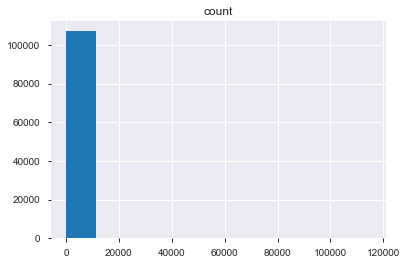

In [116]:
udata.groupby(["artid"])["userid"].agg({'count'}).sort_values(by='count', ascending=False).hist()

In [ ]:
# muy pocos artistas fueron escuchados muchas veces (mas de 10000 veces)

In [154]:
pd.crosstab(udata.userid,udata.artid)

artid,00010eb3-ebfe-4965-81ef-0ac64cd49fde,00011101-560b-4c98-8cec-60b545a160b5,0001cd84-2a11-4699-8d6b-0abf969c5f06,0002260a-b298-48cc-9895-52c9425796b7,00026532-1fe3-45fb-a0df-34aec04a1319,0002f649-8285-4a72-b847-b3854e1a449c,00034ede-a1f1-4219-be39-02f36853373e,00039b8a-3da6-4cb2-85e3-f93e30f43049,0003ccd0-27cb-4e5d-9fea-a44c8111c1d9,0003fd17-b083-41fe-83a9-d550bd4f00a1,...,fffaf9e6-8c54-43d3-b63a-071c619af644,fffb0a3a-8687-4152-bad8-9a00331d11b9,fffb8822-bf6f-4d1f-aa56-97de18f96a5c,fffbde49-3818-4ca5-8fca-4980d4328f4a,fffc6a35-ae65-48be-bcc0-9d604e05665e,fffd0dcb-5073-4b9d-ab27-0af718ec5d85,fffda7d2-eed6-41de-a98a-3fe7559023eb,fffdcec3-e652-49da-9d47-53f69181bb95,fffed9ff-98c6-458a-8379-47e7fb4ba6ec,ffff44bd-e5a5-4e87-8700-35481264e37d
userid,,,,,,,,,,,,,,,,,,,,,
user_000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
user_000008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
user_000009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
user_artid=pd.crosstab(udata.userid,udata.artid).replace(0,np.nan).stack().reset_index().rename(columns={0:'rating'})

In [156]:
#rating de usrio por artista
user_artid.head()

,userid,artid,rating
0,user_000001,00c73a38-a449-4990-86ca-5088dde1b8df,2.0
1,user_000001,012a77c9-c897-494f-87d0-0a730996494d,1.0
2,user_000001,014ba96b-b8da-49e3-8a2b-b720ae42e84c,3.0
3,user_000001,01ce7548-dab4-4ca6-8dfc-8e2e4b50d461,4.0
4,user_000001,03282c56-8a24-42f4-8bfc-96188933aefa,4.0


In [157]:
user_artid.shape

(819470, 3)

In [ ]:
#distribucion de ratings por usuario

In [188]:
ratingsbyuser = user_artid.groupby('userid')['rating'].agg({'count','mean'}).sort_values(by='count', ascending=False)

In [189]:
ratingsbyuser.shape

(992, 2)

In [190]:
ratingsbyuser.head(10)

,count,mean
userid,,
user_000774,7809,9.607376
user_000702,6730,12.827786
user_000681,5596,9.254467
user_000345,5268,9.993166
user_000031,4796,7.425980
user_000174,4433,8.060456
user_000427,4414,24.694835
user_000861,4377,34.532785
user_000750,4368,5.097756


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F802E324A8>]],
      dtype=object)

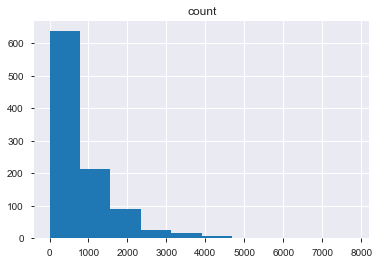

In [162]:
ratingsbyuser.hist()

In [164]:
udata[udata['artid']=='03282c56-8a24-42f4-8bfc-96188933aefa']

,userid,timestamp,artid,artname,traid,traname
1487,user_000001,2009-04-01T15:36:14Z,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,e4702c8b-7c72-41de-8d2a-886319feb331,People Make The World Go Round
11379,user_000001,2008-02-22T09:33:33Z,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,e4702c8b-7c72-41de-8d2a-886319feb331,People Make The World Go Round
11462,user_000001,2008-02-20T04:06:26Z,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,e4702c8b-7c72-41de-8d2a-886319feb331,People Make The World Go Round
11477,user_000001,2008-02-19T13:41:40Z,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,e4702c8b-7c72-41de-8d2a-886319feb331,People Make The World Go Round
3499085,user_000174,2008-11-05T17:03:08Z,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,6aae21cd-5338-43c8-97ca-dc227787e115,This Time I'Ll Be Sweeter
13184842,user_000702,2009-04-29T11:50:07Z,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,6aae21cd-5338-43c8-97ca-dc227787e115,This Time I'Ll Be Sweeter
18897817,user_000990,2008-11-13T10:24:55Z,03282c56-8a24-42f4-8bfc-96188933aefa,Angela Bofill,b93db63a-b367-43b5-bb6d-2a5c0404e09f,Can'T Slow Down


In [186]:
udata[udata['userid']=='user_000949'].describe()

,userid,timestamp,artid,artname,traid,traname
count,180840,180840,180840,180840,172042,180840
unique,1,180716,801,794,5727,6015
top,user_000949,2008-07-22T21:15:13Z,3604c99d-c146-4276-aa0c-9376d333aeb8,Everclear,60f0bfa4-8da9-4840-b5fe-23c1fc470f34,Jolene
freq,180840,2,6910,6910,1457,1457


In [238]:
#cuantos artitas excucho cada usuisroo
ratingsbyuser.head()

,userid,count,mean
0,user_000774,7809,9.607376
1,user_000702,6730,12.827786
2,user_000681,5596,9.254467
3,user_000345,5268,9.993166
4,user_000031,4796,7.425980


In [285]:
ratingsbyuser[ratingsbyuser.userid =='user_000949']

,userid,count,mean
343,user_000949,801,225.76779


In [191]:
user_artid[user_artid['userid']=='user_000949']

,userid,artid,rating
777560,user_000949,000815e2-6502-4bd9-a768-ff6feb0d9792,88.0
777561,user_000949,0039c7ae-e1a7-4a7d-9b49-0cbc716821a6,1326.0
777562,user_000949,01d3c51b-9b98-418a-8d8e-37f6fab59d8c,198.0
777563,user_000949,020bfbb4-05c3-4c86-b372-17825c262094,14.0
777564,user_000949,023d64c9-93db-4a20-8c5c-2efa1a53481a,578.0
777565,user_000949,03098741-08b3-4dd7-b3f6-1b0bfa2c879c,8.0
777566,user_000949,03172286-f7ed-4864-a4db-459cd5ca9790,1.0
777567,user_000949,0383dadf-2a4e-4d10-a46a-e9e041da8eb3,1.0
777568,user_000949,03ad1736-b7c9-412a-b442-82536d63a5c4,4520.0
777569,user_000949,043324ca-100d-48ce-8c7c-fd015afc103b,5.0


In [193]:
ratingsbyuser = ratingsbyuser.reset_index()

In [239]:
ratingsbyuser.head(10)

,userid,count,mean
0,user_000774,7809,9.607376
1,user_000702,6730,12.827786
2,user_000681,5596,9.254467
3,user_000345,5268,9.993166
4,user_000031,4796,7.425980
5,user_000174,4433,8.060456
6,user_000427,4414,24.694835
7,user_000861,4377,34.532785
8,user_000750,4368,5.097756
9,user_000210,4321,6.169405


In [273]:
ratingsbyuser[ratingsbyuser.userid=='user_000949']

,userid,count,mean
343,user_000949,801,225.76779


In [274]:
user_artid[user_artid['userid']=='user_000949']['rating'].sum()

180840.0

In [275]:
user_artid[user_artid['userid']=='user_000949']['rating'].sum()/801

225.7677902621723

In [196]:
ratingsbyuser.head(9)

,userid,count,mean
0,user_000774,7809,9.607376
1,user_000702,6730,12.827786
2,user_000681,5596,9.254467
3,user_000345,5268,9.993166
4,user_000031,4796,7.425980
5,user_000174,4433,8.060456
6,user_000427,4414,24.694835
7,user_000861,4377,34.532785
8,user_000750,4368,5.097756


In [200]:
udata.head()

,userid,timestamp,artid,artname,traid,traname
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [241]:
udata[udata['userid']=='user_000949'].count()

userid       180840
timestamp    180840
artid        180840
artname      180840
traid        172042
traname      180840
dtype: int64

In [422]:
ratingsbyuser1 = udata.groupby(['userid','artid'])['artid'].count().reset_index(name='count')

In [423]:
ratingsbyuser1[ratingsbyuser1.userid=='user_000949']

,userid,artid,count
777560,user_000949,000815e2-6502-4bd9-a768-ff6feb0d9792,88
777561,user_000949,0039c7ae-e1a7-4a7d-9b49-0cbc716821a6,1326
777562,user_000949,01d3c51b-9b98-418a-8d8e-37f6fab59d8c,198
777563,user_000949,020bfbb4-05c3-4c86-b372-17825c262094,14
777564,user_000949,023d64c9-93db-4a20-8c5c-2efa1a53481a,578
777565,user_000949,03098741-08b3-4dd7-b3f6-1b0bfa2c879c,8
777566,user_000949,03172286-f7ed-4864-a4db-459cd5ca9790,1
777567,user_000949,0383dadf-2a4e-4d10-a46a-e9e041da8eb3,1
777568,user_000949,03ad1736-b7c9-412a-b442-82536d63a5c4,4520
777569,user_000949,043324ca-100d-48ce-8c7c-fd015afc103b,5


# AQUI

In [420]:
ratingsbyuser1.head()

,userid,artid,count
0,user_000001,00c73a38-a449-4990-86ca-5088dde1b8df,2
1,user_000001,012a77c9-c897-494f-87d0-0a730996494d,1
2,user_000001,014ba96b-b8da-49e3-8a2b-b720ae42e84c,3
3,user_000001,01ce7548-dab4-4ca6-8dfc-8e2e4b50d461,4
4,user_000001,03282c56-8a24-42f4-8bfc-96188933aefa,4


In [266]:
usrxtraid = usrxtraid.reset_index()

In [267]:
usrxtraid.shape

(992, 2)

In [268]:
usrxtraid.head()

,userid,count
0,user_000949,180840
1,user_000791,156589
2,user_000861,151150
3,user_000544,150468
4,user_000800,135910


In [421]:
ratingsbyuser1.shape

(819470, 3)

# AQUI 2


In [245]:
math.log((1/180000)+1)

5.555540123550341e-06

In [236]:
math.log((3/8)+1)

0.3184537311185346

In [244]:
0.0004443457082664513/0.6

0.0007405761804440855

In [229]:
math.log(2.8)

1.0296194171811581

In [230]:
2.71828-1

1.71828

In [233]:
math.log((3/8)+1.71828)/math.log((5/6)+1.71828)

0.7886322583843891

In [234]:
math.log((3/8)+1)/math.log((5/6)+1)

0.5253834689235478

In [282]:
ratingsbyuser.shape

(992, 3)

In [367]:
ratingsbyuser[ratingsbyuser.userid =='user_000002']

,userid,count,mean
204,user_000002,1211,46.845582


In [313]:
c =ratingsbyuser.loc[ratingsbyuser.userid =='user_000001','count'].iloc[0]

In [314]:
c

578

# INicia formula

In [413]:
usrxtraid.shape

(992, 2)

In [427]:
ratingsbyuser1.shape

(819470, 3)

In [424]:
ratingsbyuser1 = ratingsbyuser1.sort_values(by='userid', ascending=False)


In [425]:
ratingsbyuser1.head(9)

,userid,artid,count
819469,user_001000,ffe02aed-ef7e-4736-a186-c2f1dd55ce8d,1
819047,user_001000,56c5055d-f656-4ed2-a040-7d860feccfb7,11
819054,user_001000,59a7fbcb-ff74-494d-abd0-9c82359040c9,42
819053,user_001000,597dd959-1a24-457e-bea0-36f3fee2a5cb,2
819052,user_001000,593d417f-0532-43ee-8246-f374c98275ca,16
819051,user_001000,584c04d2-4acc-491b-8a0a-e63133f4bfc4,43
819050,user_001000,5837d14e-4d18-49cf-a759-e5818714bce4,1
819049,user_001000,58101b4b-3193-466f-acea-427fe5e86213,1
819048,user_001000,57843aed-c1c1-4f45-9859-478dd999bc18,1


In [426]:
ratingsbyuser1[ratingsbyuser1.userid=='user_000001']

,userid,artid,count
191,user_000001,5b3d1c89-c602-417e-a3f3-c3c9397d8ac8,4
196,user_000001,5e29d25a-ba6f-4029-9dd4-c3c07e232482,1
195,user_000001,5dfa70d0-d170-4b5d-a901-e6c2edc96dd1,9
194,user_000001,5ddcd28d-e3b9-4e07-a853-d0a6316e64ea,2
193,user_000001,5c71ea68-9238-4dfc-8519-bd6eff6bc28b,1
192,user_000001,5b5bd864-33a2-49b0-a70a-84d3a0eef56a,6
184,user_000001,58368691-5b44-45d8-b617-47a7633f5e30,7
190,user_000001,5a557973-2e65-4429-a60d-a9886bfbac6a,26
189,user_000001,59d27db5-1f79-44e5-98a9-7d7aefdffd6a,4
188,user_000001,59ae7a1a-f454-435b-8a5a-e327e692bb5a,2


In [289]:
#usrxtraid[usrxtraid.userid=='user_000949']

,userid,count
0,user_000949,180840


In [335]:
usrxtraid[usrxtraid.userid=='user_000001']

,userid,count
393,user_000001,15422


In [345]:
ratingsbyuser1.loc[ratingsbyuser1.userid=='user_000001','count'].sum()

15422

In [364]:
usrxtraid.loc[usrxtraid.userid=='user_000002','count'].iloc[0]

56730

In [392]:
usuario =""
i =1
ini=0

for index, row in ratingsbyuser1.iterrows():
    tx_artid = row[2]  
    
    if usuario != row[0]:
        usuario = row[0]
        ii = 0
        tx_usuario = usrxtraid.loc[usrxtraid.userid==usuario,'count'].iloc[0]
        print("entra")
        #tx_userid = ratingsbyuser1.loc[ratingsbyuser1.userid== row.userid,'count'].sum()
        
    
    
    #val_ap = math.log((tx_artid/tx_usuario)+1)
    
    ii = ii +1
    print(ii ,"...................................")
    print(row.userid)
    print(row.artid)
    print ('tx_usr_artid ', tx_artid)
    print('tx total usurio', tx_usuario )
    print("****************************************")
   # print('tx_artid ', tx_artid)
   # print(val_ap)
    
    if ini > i:
        break
    ini = ini+1

entra
1 ...................................
user_000001
00c73a38-a449-4990-86ca-5088dde1b8df
tx_usr_artid  2
tx total usurio 15422
****************************************
2 ...................................
user_000001
012a77c9-c897-494f-87d0-0a730996494d
tx_usr_artid  1
tx total usurio 15422
****************************************
3 ...................................
user_000001
014ba96b-b8da-49e3-8a2b-b720ae42e84c
tx_usr_artid  3
tx total usurio 15422
****************************************


In [428]:
# *******************CALCULO AP
usuario =""
#i =10
#ini=0
AP=[]

for index, row in ratingsbyuser1.iterrows():
    tx_artid = row[2]  
    
    if usuario != row[0]:
        usuario = row[0]
        #ii = 0
        tx_usuario = usrxtraid.loc[usrxtraid.userid==usuario,'count'].iloc[0]
        #print("entra")
        #tx_userid = ratingsbyuser1.loc[ratingsbyuser1.userid== row.userid,'count'].sum()
        
    
    
    val_ap = math.log((tx_artid/tx_usuario)+1)
    
    AP.append(val_ap)
    '''
    #ii = ii +1
    print(ii ,"...................................")
    print(row.userid)
    print(row.artid)
    print ('tx_usr_artid ', tx_artid)
    print('tx total usurio', tx_usuario )
    print('Valor AP : ', val_ap)
    print("****************************************")
   # print('tx_artid ', tx_artid)
   # print(val_ap)
    
    if ini > i:
        break
    ini = ini+1
    '''


In [381]:
round(math.log((1/15422)+1),5)

6e-05

In [429]:
len(AP)


819470

In [430]:
ratingsbyuser1['val_AP'] = AP

In [431]:
ratingsbyuser1.head()

,userid,artid,count,val_AP
819469,user_001000,ffe02aed-ef7e-4736-a186-c2f1dd55ce8d,1,0.000056
819047,user_001000,56c5055d-f656-4ed2-a040-7d860feccfb7,11,0.000612
819054,user_001000,59a7fbcb-ff74-494d-abd0-9c82359040c9,42,0.002336
819053,user_001000,597dd959-1a24-457e-bea0-36f3fee2a5cb,2,0.000111
819052,user_001000,593d417f-0532-43ee-8246-f374c98275ca,16,0.000891


In [432]:
ratingsbyuser1[ratingsbyuser1.artid=='00c73a38-a449-4990-86ca-5088dde1b8df']

,userid,artid,count,val_AP
141161,user_000174,00c73a38-a449-4990-86ca-5088dde1b8df,3,0.000084
0,user_000001,00c73a38-a449-4990-86ca-5088dde1b8df,2,0.000130


In [449]:
max_AP =ratingsbyuser1.loc[ratingsbyuser1.artid=='00c73a38-a449-4990-86ca-5088dde1b8df','val_AP'].max()

In [450]:
max_AP

0.00012967645742088032

In [435]:
ratingsbyuser1.loc[ratingsbyuser1.artid=='00c73a38-a449-4990-86ca-5088dde1b8df','val_AP'].min()/max_AP

0.6474176887571108

In [436]:
ratingsbyuser1 = ratingsbyuser1.sort_values(by='artid', ascending=False)

In [454]:
ratingsbyuser1.shape

(819470, 4)

In [439]:
ratingsbyuser1.head(9)

,userid,artid,count,val_AP
696011,user_000841,ffff44bd-e5a5-4e87-8700-35481264e37d,1,0.000030
42583,user_000045,fffed9ff-98c6-458a-8379-47e7fb4ba6ec,4,0.005115
7833,user_000010,fffdcec3-e652-49da-9d47-53f69181bb95,1,0.000213
336510,user_000427,fffda7d2-eed6-41de-a98a-3fe7559023eb,30,0.000275
459972,user_000585,fffda7d2-eed6-41de-a98a-3fe7559023eb,1,0.000175
174624,user_000211,fffd0dcb-5073-4b9d-ab27-0af718ec5d85,19,0.003100
471974,user_000604,fffc6a35-ae65-48be-bcc0-9d604e05665e,1,0.000031
210780,user_000266,fffc6a35-ae65-48be-bcc0-9d604e05665e,10,0.000641
274573,user_000348,fffc6a35-ae65-48be-bcc0-9d604e05665e,1,0.000011


In [440]:
ratingsbyuser1[ratingsbyuser1.artid =='ffff44bd-e5a5-4e87-8700-35481264e37d']

,userid,artid,count,val_AP
696011,user_000841,ffff44bd-e5a5-4e87-8700-35481264e37d,1,0.00003


In [453]:
RP=[]
art_id =""
for index, row in ratingsbyuser1.iterrows():
    val_ap = row[3]  
    
    if art_id != row[1]:
        art_id = row[1]
        
        max_AP =ratingsbyuser1.loc[ratingsbyuser1.artid==art_id,'val_AP'].max()

    val_ap = val_ap/max_AP
    
    RP.append(val_ap)

In [455]:
len(RP)

819470

In [456]:
ratingsbyuser1['val_RP'] = RP

In [457]:
ratingsbyuser1.shape

(819470, 5)

In [458]:
ratingsbyuser1.head()

,userid,artid,count,val_AP,val_RP
696011,user_000841,ffff44bd-e5a5-4e87-8700-35481264e37d,1,0.000030,1.000000
42583,user_000045,fffed9ff-98c6-458a-8379-47e7fb4ba6ec,4,0.005115,1.000000
7833,user_000010,fffdcec3-e652-49da-9d47-53f69181bb95,1,0.000213,1.000000
336510,user_000427,fffda7d2-eed6-41de-a98a-3fe7559023eb,30,0.000275,1.000000
459972,user_000585,fffda7d2-eed6-41de-a98a-3fe7559023eb,1,0.000175,0.634139


In [539]:
ratingsbyuser1.loc[ratingsbyuser1.userid =='user_000615','count'].iloc[0:].max()

243

In [541]:
usrxtraid[usrxtraid.userid =='user_000615']

,userid,count
404,user_000615,14981


In [544]:
ratingsbyuser1.loc[ratingsbyuser1.artid =='7db64f11-f666-4f53-a423-fb073a09a2b7','val_AP'].iloc[0:].max()

0.00020023360654260636

In [540]:
ratingsbyuser1[ratingsbyuser1.artid =='7db64f11-f666-4f53-a423-fb073a09a2b7']

,userid,artid,count,val_AP,val_RP,ratings
479762,user_000615,7db64f11-f666-4f53-a423-fb073a09a2b7,3,0.0002,1.0,5.0


In [542]:
#3/14981
math.log((3/14981)+1)

0.00020023360654260636

In [543]:
3/14981

0.000200253654629197

In [460]:
0.000175/0.000275

0.6363636363636364

In [461]:
ratingsbyuser1[ratingsbyuser1.userid=='user_000949']

,userid,artid,count,val_AP,val_RP
778360,user_000949,ff9deaae-da4f-42b7-a19e-36fedd3fc706,9,0.000050,0.003076
778359,user_000949,ff95eb47-41c4-4f7f-a104-cdc30f02e872,26,0.000144,0.005605
778358,user_000949,ff6e677f-91dd-4986-a174-8db0474b1799,23,0.000127,0.000406
778357,user_000949,ff6cb06c-a6e5-4ab9-a5ce-fa2095be45b9,19,0.000105,0.067186
778356,user_000949,fd3c3f9f-a471-498e-ab3a-940ac20b6bbd,7,0.000039,0.003460
778355,user_000949,fca8cdfa-120d-49ec-b1da-0ff8aa90c3ab,6,0.000033,0.002709
778354,user_000949,fc63d806-ca89-4ea3-a404-ee6de695743f,4,0.000022,0.003651
778353,user_000949,fc61dd75-880b-44ba-9ba9-c7b643d33413,159,0.000879,0.017638
778352,user_000949,fc015f11-be38-4b7d-b3e8-5d809242ecec,3,0.000017,0.000217
778351,user_000949,fbd2a255-1d57-4d31-ac11-65b671c19958,127,0.000702,0.021908


In [463]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')
ratingsbyuser1.to_csv('ratingsbyuser1.csv')

In [490]:
round(5*ratingsbyuser1.loc[ratingsbyuser1.userid=='user_000949','val_RP'].iloc[0:],3)

778360    0.015
778359    0.028
778358    0.002
778357    0.336
778356    0.017
778355    0.014
778354    0.018
778353    0.088
778352    0.001
778351    0.110
778350    0.001
778349    0.080
778348    0.715
778347    0.003
778346    0.055
778345    0.290
778344    0.035
778343    0.001
778342    0.161
778341    0.023
778340    0.002
778339    0.239
778338    0.172
778337    5.000
778336    0.009
778335    0.001
778334    0.005
778333    0.002
778332    0.940
778331    0.248
          ...  
777589    0.001
777588    0.018
777587    0.017
777586    0.012
777585    0.021
777584    0.005
777583    0.189
777582    0.008
777581    1.153
777580    0.001
777579    0.020
777578    0.017
777577    3.478
777576    0.131
777575    0.017
777574    0.026
777573    1.312
777572    5.000
777571    0.009
777570    0.679
777569    0.007
777568    0.580
777567    0.000
777566    0.002
777565    0.011
777564    0.601
777563    0.012
777562    0.041
777561    0.557
777560    5.000
Name: val_RP, Length: 80

In [488]:
def round_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.ceil(n * multiplier) / multiplier

In [499]:
#round_up(ratingsbyuser1.loc[ratingsbyuser1.userid=='user_000949','val_RP'].iloc[0:])

In [500]:
#round_up(ratingsbyuser1.loc[ratingsbyuser1.userid=='user_000949','val_RP'].iloc[0].astype(float),4)

In [504]:
#ratingsbyuser1.val_RP

In [505]:
ratingsbyuser1.val_RP

696011    1.000000
42583     1.000000
7833      1.000000
336510    1.000000
459972    0.634139
174624    1.000000
471974    0.008789
210780    0.179819
274573    0.003127
6822      0.413006
515306    0.026805
756841    0.027670
424057    0.012533
686010    0.023423
653411    0.001791
460324    0.679012
10724     0.068119
473407    0.067485
614925    0.026411
642618    0.420422
314587    1.000000
379911    0.009050
725269    0.012224
32226     0.007876
788096    0.010194
86573     0.003944
576132    0.006254
567333    0.009747
484232    0.119744
618065    0.031266
            ...   
118171    1.000000
722876    0.310683
125171    1.000000
530858    0.202642
588684    0.424818
271217    1.000000
169227    0.028903
579208    1.000000
442055    0.119379
744877    0.339970
192007    0.034387
778361    0.028211
332097    0.014137
606374    0.069202
692708    0.082402
726886    1.000000
235394    1.000000
156565    0.382480
184850    1.000000
683821    0.055231
233183    0.101620
33809     0.

In [506]:
# normalizar a 5
ratingsbyuser1['ratings']=round(5*ratingsbyuser1.val_RP,3)

In [507]:
ratingsbyuser1.shape

(819470, 6)

In [508]:
ratingsbyuser1.head()

,userid,artid,count,val_AP,val_RP,ratings
696011,user_000841,ffff44bd-e5a5-4e87-8700-35481264e37d,1,0.000030,1.000000,5.000
42583,user_000045,fffed9ff-98c6-458a-8379-47e7fb4ba6ec,4,0.005115,1.000000,5.000
7833,user_000010,fffdcec3-e652-49da-9d47-53f69181bb95,1,0.000213,1.000000,5.000
336510,user_000427,fffda7d2-eed6-41de-a98a-3fe7559023eb,30,0.000275,1.000000,5.000
459972,user_000585,fffda7d2-eed6-41de-a98a-3fe7559023eb,1,0.000175,0.634139,3.171


In [510]:
ratingsbyuser1[ratingsbyuser1.ratings==0]

,userid,artid,count,val_AP,val_RP,ratings
116709,user_000135,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000025,0.000081,0.0
200792,user_000249,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000016,0.000050,0.0
414381,user_000532,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000029,0.000093,0.0
162752,user_000199,ff6e677f-91dd-4986-a174-8db0474b1799,2,0.000022,0.000071,0.0
749141,user_000910,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000026,0.000081,0.0
274567,user_000348,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000011,0.000036,0.0
731291,user_000882,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000016,0.000051,0.0
655480,user_000792,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000022,0.000070,0.0
541334,user_000685,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000013,0.000042,0.0
744341,user_000901,ff6e677f-91dd-4986-a174-8db0474b1799,1,0.000031,0.000098,0.0


# Surprise

In [636]:
prueba =ratingsbyuser1[:60000]

In [708]:
prueba.head()

,userid,artid,count,val_AP,val_RP,ratings,User_ID,item_ID
696011,user_000841,ffff44bd-e5a5-4e87-8700-35481264e37d,1,0.000030,1.000000,5.000,825,7700
42583,user_000045,fffed9ff-98c6-458a-8379-47e7fb4ba6ec,4,0.005115,1.000000,5.000,44,7699
7833,user_000010,fffdcec3-e652-49da-9d47-53f69181bb95,1,0.000213,1.000000,5.000,9,7698
336510,user_000427,fffda7d2-eed6-41de-a98a-3fe7559023eb,30,0.000275,1.000000,5.000,420,7697
459972,user_000585,fffda7d2-eed6-41de-a98a-3fe7559023eb,1,0.000175,0.634139,3.171,572,7697


In [709]:
prueba.dtypes

userid      object
artid       object
count        int64
val_AP     float64
val_RP     float64
ratings    float64
User_ID      int16
item_ID      int16
dtype: object

In [726]:
math.ceil(5*prueba.loc[prueba.ratings ==0,'val_RP'].iloc[0])

1

In [707]:
round(5*prueba.loc[prueba.ratings ==0,'val_RP'].iloc[0])

0.0

In [699]:
prueba.val_RP.max()

1.0

In [700]:
math.ceil(5*1)

5

In [712]:
type(prueba)

pandas.core.frame.DataFrame

In [720]:
def round_up(n, decimals=0): 
    multiplier = 10 ** decimals 
    return math.ceil(n * multiplier) / multiplier

In [736]:
rating_1 = []
for indes,row in prueba.iterrows():
    #print(math.ceil(5*row['val_RP']))
    rating_1.append(math.ceil(5*row['val_RP']))
    #break

In [737]:
len(rating_1)

60000

In [743]:
prueba['rating'] = rating_1

C:\Users\rsantacruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [744]:
prueba.head()

,userid,artid,count,val_AP,val_RP,ratings,User_ID,item_ID,rating
696011,user_000841,ffff44bd-e5a5-4e87-8700-35481264e37d,1,0.000030,1.000000,5.000,825,7700,5
42583,user_000045,fffed9ff-98c6-458a-8379-47e7fb4ba6ec,4,0.005115,1.000000,5.000,44,7699,5
7833,user_000010,fffdcec3-e652-49da-9d47-53f69181bb95,1,0.000213,1.000000,5.000,9,7698,5
336510,user_000427,fffda7d2-eed6-41de-a98a-3fe7559023eb,30,0.000275,1.000000,5.000,420,7697,5
459972,user_000585,fffda7d2-eed6-41de-a98a-3fe7559023eb,1,0.000175,0.634139,3.171,572,7697,4


In [739]:
prueba.shape

(60000, 8)

In [745]:
#prueba['rating'] = math.ceil(5*prueba.ratings)
#math.ceil(5*prueba.val_RP.astype(float))
#np.round(5*prueba['val_RP'])
#round_up(5*prueba['val_RP'])
#5*prueba.val_RP.astype(float)

In [638]:
prueba['User_ID'] = prueba.userid.astype('category').cat.codes

C:\Users\rsantacruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [639]:
prueba['item_ID'] = prueba.artid.astype('category').cat.codes

C:\Users\rsantacruz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [640]:
prueba.sort_values(by='artid', ascending=False)

,userid,artid,count,val_AP,val_RP,ratings,User_ID,item_ID
696011,user_000841,ffff44bd-e5a5-4e87-8700-35481264e37d,1,0.000030,1.000000,5.000,825,7700
42583,user_000045,fffed9ff-98c6-458a-8379-47e7fb4ba6ec,4,0.005115,1.000000,5.000,44,7699
7833,user_000010,fffdcec3-e652-49da-9d47-53f69181bb95,1,0.000213,1.000000,5.000,9,7698
459972,user_000585,fffda7d2-eed6-41de-a98a-3fe7559023eb,1,0.000175,0.634139,3.171,572,7697
336510,user_000427,fffda7d2-eed6-41de-a98a-3fe7559023eb,30,0.000275,1.000000,5.000,420,7697
174624,user_000211,fffd0dcb-5073-4b9d-ab27-0af718ec5d85,19,0.003100,1.000000,5.000,210,7696
618065,user_000756,fffc6a35-ae65-48be-bcc0-9d604e05665e,1,0.000111,0.031266,0.156,741,7695
788096,user_000958,fffc6a35-ae65-48be-bcc0-9d604e05665e,2,0.000036,0.010194,0.051,940,7695
86573,user_000097,fffc6a35-ae65-48be-bcc0-9d604e05665e,1,0.000014,0.003944,0.020,96,7695
576132,user_000709,fffc6a35-ae65-48be-bcc0-9d604e05665e,2,0.000022,0.006254,0.031,694,7695


In [746]:
prueba[prueba.rating ==0].count()

userid     0
artid      0
count      0
val_AP     0
val_RP     0
ratings    0
User_ID    0
item_ID    0
rating     0
dtype: int64

In [747]:
prueba[prueba.rating ==0]

,userid,artid,count,val_AP,val_RP,ratings,User_ID,item_ID,rating


In [758]:
 prueba =prueba[:50000]

In [759]:
reader = Reader( rating_scale = ( 1, 5 ) )
#Se crea el dataset a partir del dataframe
surprise_dataset = Dataset.load_from_df(prueba [ [ 'User_ID','item_ID', 'rating' ] ], reader )

In [760]:
train_set, test_set=  train_test_split(surprise_dataset, test_size=.2)

In [761]:
train_set.n_ratings

40000

In [762]:
len(test_set)

10000

In [763]:
test_set[1]

(450, 1640, 1.0)

In [764]:
# se crea un modelo knnbasic item-item con similitud coseno 
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)

In [765]:
#Se le pasa la matriz de utilidad al algoritmo 
algo.fit(trainset=train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [766]:
algo.predict(450,1640)

Prediction(uid=450, iid=1640, r_ui=None, est=1, details={'actual_k': 20, 'was_impossible': False})

In [657]:
algo.predict(687,1)

Prediction(uid=687, iid=1, r_ui=None, est=0.9705999999999999, details={'actual_k': 20, 'was_impossible': False})

In [767]:
test_predictions=algo.test(test_set)

In [768]:
##5 primeras predicciones
test_predictions[0:5]

[Prediction(uid=559, iid=7482, r_ui=1.0, est=1.25, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=450, iid=1640, r_ui=1.0, est=1, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=372, iid=1738, r_ui=1.0, est=1.6579528847869718, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=443, iid=2909, r_ui=1.0, est=1.4, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=883, iid=5831, r_ui=2.0, est=1.5, details={'actual_k': 20, 'was_impossible': False})]

In [658]:
prueba[(prueba.User_ID ==824) & (prueba.item_ID ==606) ]

,userid,artid,count,val_AP,val_RP,ratings,User_ID,item_ID
484192,user_000619,eee97b7d-1cfb-44b2-b064-dca25745b18f,3,0.000427,0.372209,1.861,606,606


In [667]:
algo.predict(273,7561)

Prediction(uid=273, iid=7561, r_ui=None, est=2.2977679305596777, details={'actual_k': 15, 'was_impossible': False})

In [661]:
prueba[(prueba['count'] >= 300) ]

,userid,artid,count,val_AP,val_RP,ratings,User_ID,item_ID
694331,user_000840,ffe9ec08-6b6b-4993-9394-e280b429dbfd,603,0.062498,1.000000,5.000,824,7666
262985,user_000341,ffe9ec08-6b6b-4993-9394-e280b429dbfd,342,0.016574,0.265196,1.326,335,7666
341541,user_000431,ffe9ec08-6b6b-4993-9394-e280b429dbfd,497,0.006675,0.106798,0.534,423,7666
700571,user_000845,ffe9ec08-6b6b-4993-9394-e280b429dbfd,422,0.015544,0.248707,1.244,829,7666
741762,user_000899,ffe9ec08-6b6b-4993-9394-e280b429dbfd,591,0.013428,0.214854,1.074,881,7666
162756,user_000199,ffe16bba-4d84-409b-8f22-5242c60b930f,399,0.004454,0.332685,1.663,198,7648
588683,user_000729,ffe16bba-4d84-409b-8f22-5242c60b930f,429,0.012426,0.928072,4.640,714,7648
128074,user_000156,ffe02aed-ef7e-4736-a186-c2f1dd55ce8d,415,0.008901,0.488889,2.444,155,7644
442904,user_000570,ffd3ac37-4d0a-42a1-a41e-e160cf60dca5,655,0.014395,1.000000,5.000,557,7620
336501,user_000427,ffce4003-a756-46c0-b062-2e942de13d37,350,0.003206,1.000000,5.000,420,7610


In [769]:
accuracy.rmse( test_predictions, verbose = True )

RMSE: 1.4463


1.446332111627891